# Portfolio ETF Analysis

## Data Loading & Prep

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../processed/etf_returns.csv")
df["Date"] = pd.to_datetime(df["Date"])

In [2]:
df.head()

,Date,Adj_Close,Ticker,Market,Daily_Return,Cumulative_Return
0,2014-01-02,56.922413,BND,US,NaN,NaN
1,2014-01-03,56.929501,BND,US,0.000125,0.000125
2,2014-01-06,56.979229,BND,US,0.000874,0.000998
3,2014-01-07,57.050289,BND,US,0.001247,0.002247
4,2014-01-08,56.865547,BND,US,-0.003238,-0.000999


In [3]:
portfolio_weights = {
    "ZAG.TO" : 0.40,
    "XTI":0.30,
    "XIC.TO":0.20,
    "SPLV":0.10
}

In [4]:
def compute_portfolio_returns(df, weights):
    portfolio_df = df[df["Ticker"].isin(weights.keys())].copy()
    portfolio_df["Weight"] = portfolio_df["Ticker"].map(weights)
    
    daily_returns = (
        portfolio_df
        .assign(Weighted_Return=lambda x: x["Daily_Return"] * x["Weight"])
        .groupby("Date")["Weighted_Return"]
        .sum()
        .reset_index()
    )
    
    daily_returns["Cumulative_Return"] = (
        (1 + daily_returns["Weighted_Return"]).cumprod() - 1
    )
    
    return daily_returns

In [5]:
portfolio_full = compute_portfolio_returns(df, portfolio_weights)

In [6]:
recent_cutoff = portfolio_full["Date"].max() - pd.DateOffset(months=12)
portfolio_recent = portfolio_full[portfolio_full["Date"] >= recent_cutoff]

## Portfolio 1 – Conservative Allocation
- Definition
- Backtest
- Plot
- Interpretation

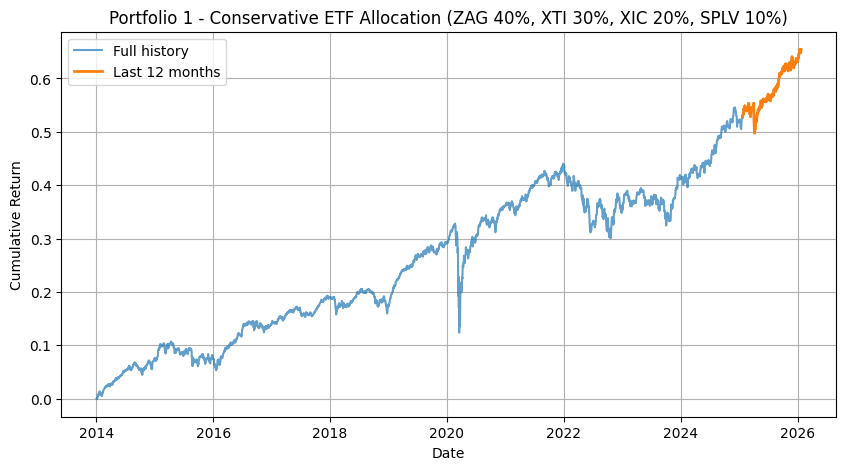

In [7]:
plt.figure(figsize=(10, 5))

plt.plot(
    portfolio_full["Date"],
    portfolio_full["Cumulative_Return"],
    label="Full history",
    alpha=0.7
)

plt.plot(
    portfolio_recent["Date"],
    portfolio_recent["Cumulative_Return"],
    label="Last 12 months",
    linewidth=2
)

plt.title("Portfolio 1 - Conservative ETF Allocation (ZAG 40%, XTI 30%, XIC 20%, SPLV 10%)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

## Portfolio 2 – Growth-Oriented Allocation
- Definition
- Backtest
- Plot
- InterpretationPortfolio 2

In [8]:
portfolio2_weights = {
    "XTI" : 0.50, # US total market (growth engine)
    "VFC.TO" : 0.30, # S&P 500 exposure
    "XIC.TO" : 0.20, # Canadian equities
    "SPLV" : 0.10  # Low-vol equity to slightly dampen risk
}

In [9]:
portfolio2_df = df[df["Ticker"].isin(portfolio2_weights.keys())].copy()

portfolio2_df["Weight"] = portfolio2_df["Ticker"].map(portfolio2_weights)

portfolio2_df["Weighted_Return"] = (
    portfolio2_df["Daily_Return"] * portfolio2_df["Weight"]
)


In [10]:
portfolio2_daily = (
    portfolio2_df
    .groupby("Date")["Weighted_Return"]
    .sum()
    .reset_index()
)

In [11]:
portfolio2_daily["Cumulative_Return"] = (
    (1 + portfolio2_daily["Weighted_Return"]).cumprod() - 1
)

In [12]:
portfolio2_full = portfolio2_daily.copy()

cutoff_date = portfolio2_full["Date"].max() - pd.DateOffset(months=12)

portfolio2_recent = portfolio2_full[
    portfolio2_full["Date"] >= cutoff_date
]

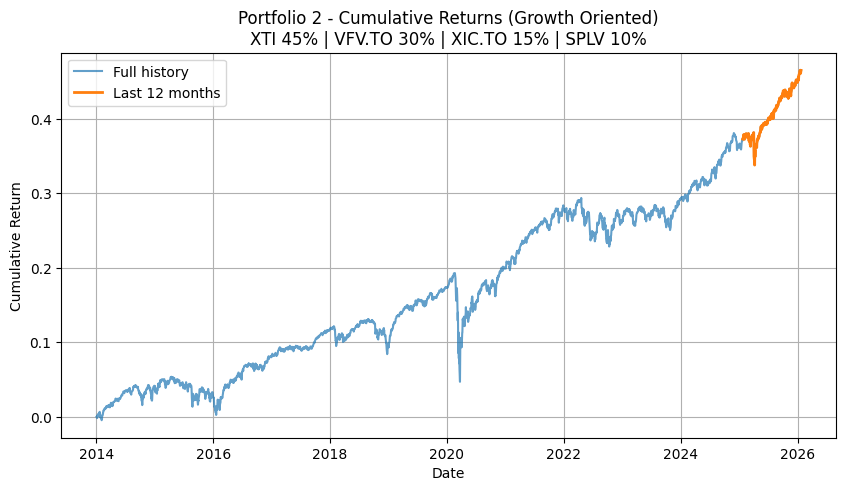

In [13]:
plt.figure(figsize=(10, 5))

plt.plot(
    portfolio2_full["Date"],
    portfolio2_full["Cumulative_Return"],
    label="Full history",
    alpha=0.7
)

plt.plot(
    portfolio2_recent["Date"],
    portfolio2_recent["Cumulative_Return"],
    label="Last 12 months",
    linewidth=2 
)

plt.title(
    "Portfolio 2 - Cumulative Returns (Growth Oriented)\n"
    "XTI 45% | VFV.TO 30% | XIC.TO 15% | SPLV 10%"
    )

plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

## Portfolio 1 vs Portfolio 2

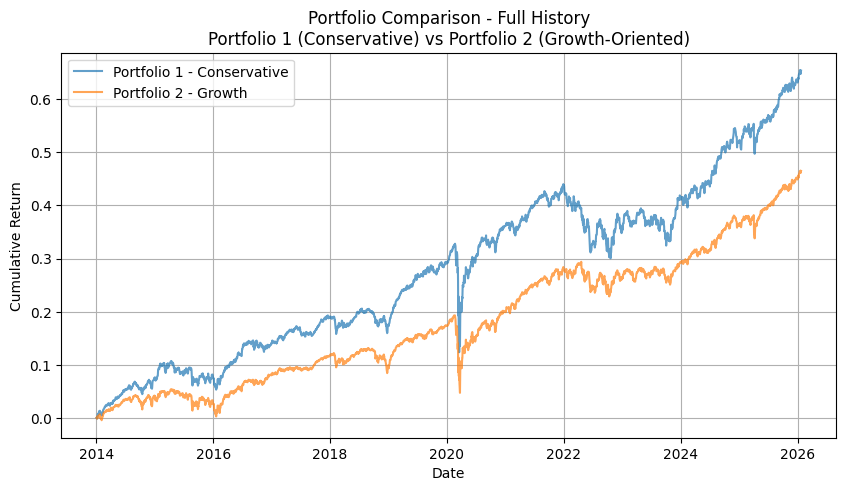

In [14]:
plt.figure(figsize=(10,5))

plt.plot(
    portfolio_full["Date"],
    portfolio_full["Cumulative_Return"],
    label="Portfolio 1 - Conservative",
    alpha=0.7
)

plt.plot(
    portfolio2_full["Date"],
    portfolio2_full["Cumulative_Return"],
    label="Portfolio 2 - Growth",
    alpha=0.7
)

plt.title(
    "Portfolio Comparison - Full History\n"
    "Portfolio 1 (Conservative) vs Portfolio 2 (Growth-Oriented)"
)
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()


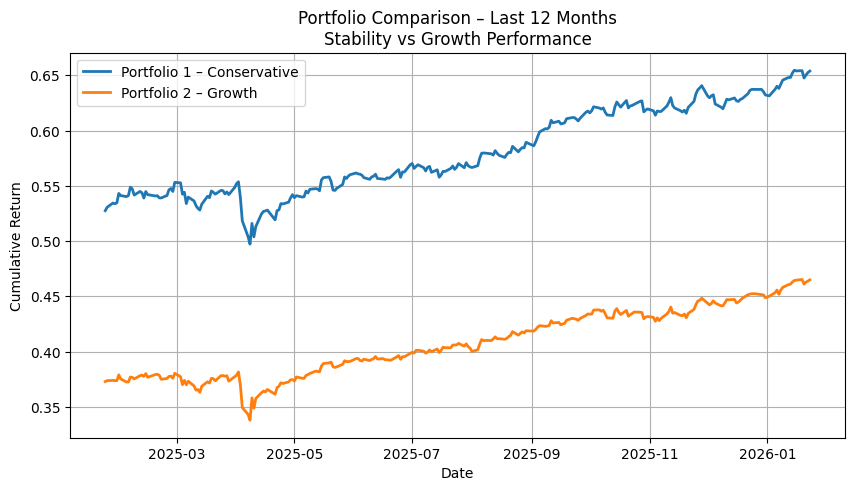

In [15]:
plt.figure(figsize=(10,5))

plt.plot(
    portfolio_recent["Date"],
    portfolio_recent["Cumulative_Return"],
    label="Portfolio 1 – Conservative",
    linewidth=2
)

plt.plot(
    portfolio2_recent["Date"],
    portfolio2_recent["Cumulative_Return"],
    label="Portfolio 2 – Growth",
    linewidth=2
)

plt.title(
    "Portfolio Comparison – Last 12 Months\n"
    "Stability vs Growth Performance"
)
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()


## Portfolio 3 (Market-tracking + Stability)

### Portfolio 3 – Balanced Index Strategy
VTI 50% | VCN.TO 20% | BND 20% | ZAG.TO 10%

In [16]:
portfolio_3_weights = {
    "VTI": 0.50,
    "VCN.TO": 0.20,
    "BND": 0.20,
    "ZAG.TO": 0.10
}

In [17]:
portfolio_3 = (
    df[df["Ticker"].isin(portfolio_3_weights.keys())]
    .assign(Weight=lambda x: x["Ticker"].map(portfolio_3_weights))
)

portfolio_3["Weighted_Return"] = (
    portfolio_3["Daily_Return"] * portfolio_3["Weight"]
)

portfolio_3 = (
    portfolio_3
    .groupby("Date", as_index=False)["Weighted_Return"]
    .sum()
    .rename(columns={"Weighted_Return": "Portfolio_Return"})
)

In [18]:
portfolio_3["Cumulative_Return"] = (
    (1 + portfolio_3["Portfolio_Return"]).cumprod() - 1
)

In [19]:
cutoff_date = portfolio_3["Date"].max() - pd.DateOffset(months=12)

portfolio_3_recent = portfolio_3[
    portfolio_3["Date"] >= cutoff_date
]

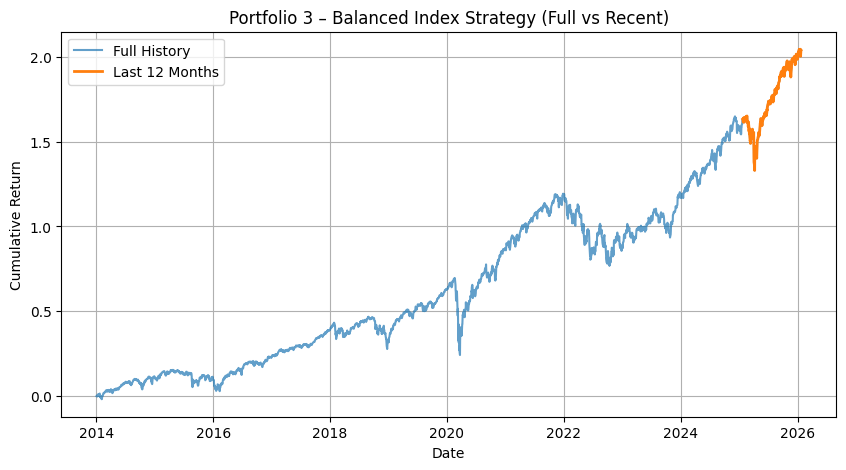

In [20]:
plt.figure(figsize=(10,5))

plt.plot(
    portfolio_3["Date"],
    portfolio_3["Cumulative_Return"],
    label="Full History",
    alpha=0.7
)

plt.plot(
    portfolio_3_recent["Date"],
    portfolio_3_recent["Cumulative_Return"],
    label="Last 12 Months",
    linewidth=2
)

plt.title("Portfolio 3 – Balanced Index Strategy (Full vs Recent)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()


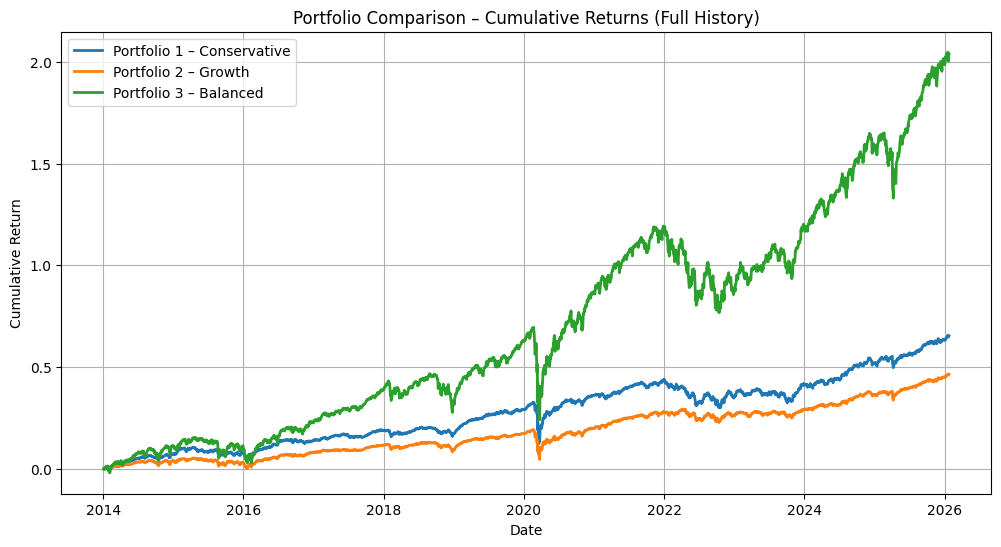

In [21]:
plt.figure(figsize=(12,6))

plt.plot(
    portfolio_full["Date"],
    portfolio_full["Cumulative_Return"],
    label="Portfolio 1 – Conservative",
    linewidth=2
)

plt.plot(
    portfolio2_full["Date"],
    portfolio2_full["Cumulative_Return"],
    label="Portfolio 2 – Growth",
    linewidth=2
)

plt.plot(
    portfolio_3["Date"],
    portfolio_3["Cumulative_Return"],
    label="Portfolio 3 – Balanced",
    linewidth=2
)

plt.title("Portfolio Comparison – Cumulative Returns (Full History)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()


In [22]:
portfolio_1_full = portfolio_full
portfolio_1_recent = portfolio_recent
portfolio_1_weights = portfolio_weights

In [23]:
recent_cutoff = df["Date"].max() - pd.DateOffset(months=12)

p1_recent = portfolio_1_full[portfolio_1_full["Date"] >= recent_cutoff].copy()
p2_recent = portfolio2_full[portfolio2_full["Date"] >= recent_cutoff].copy()
p3_recent = portfolio_3[portfolio_3["Date"] >= recent_cutoff].copy()

In [24]:
def normalize_recent(df):
    df = df.copy()
    df["Normalized_Return"] = df["Cumulative_Return"] - df["Cumulative_Return"].iloc[0]
    return df

p1_recent = normalize_recent(p1_recent)
p2_recent = normalize_recent(p2_recent)
p3_recent = normalize_recent(p3_recent)

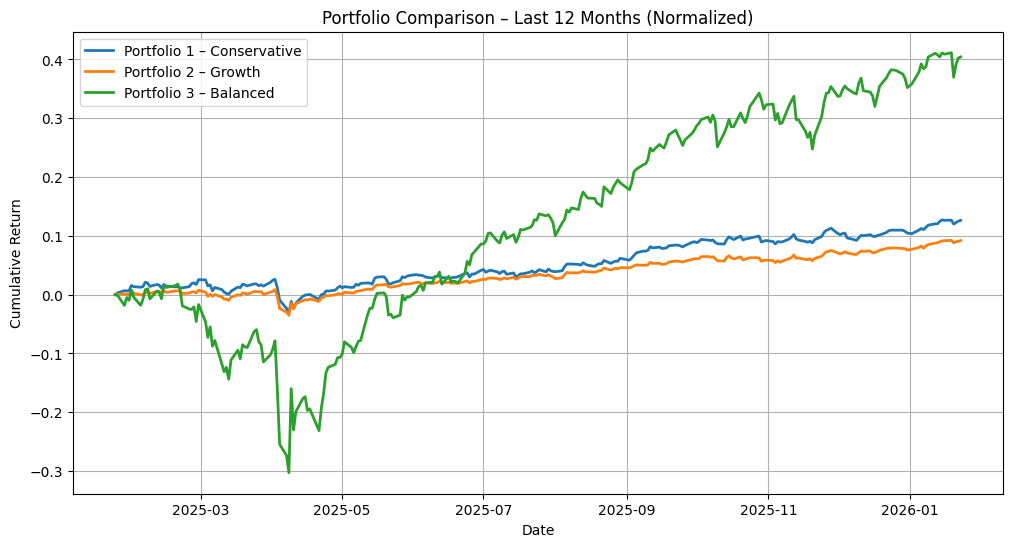

In [25]:
plt.figure(figsize=(12,6))

plt.plot(p1_recent["Date"], p1_recent["Normalized_Return"],
         label="Portfolio 1 – Conservative", linewidth=2)

plt.plot(p2_recent["Date"], p2_recent["Normalized_Return"],
         label="Portfolio 2 – Growth", linewidth=2)

plt.plot(p3_recent["Date"], p3_recent["Normalized_Return"],
         label="Portfolio 3 – Balanced", linewidth=2)

plt.title("Portfolio Comparison – Last 12 Months (Normalized)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

## Drawdown Analysis (Risk & Pain Assessment)

In [26]:
def calculate_drawdown(cumulative_returns: pd.Series) -> pd.Series:
    running_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - running_max) / running_max
    return drawdown

In [27]:
portfolio1_dd = calculate_drawdown(portfolio_1_full["Cumulative_Return"])
portfolio2_dd = calculate_drawdown(portfolio2_full["Cumulative_Return"])
portfolio3_dd = calculate_drawdown(portfolio_3["Cumulative_Return"])


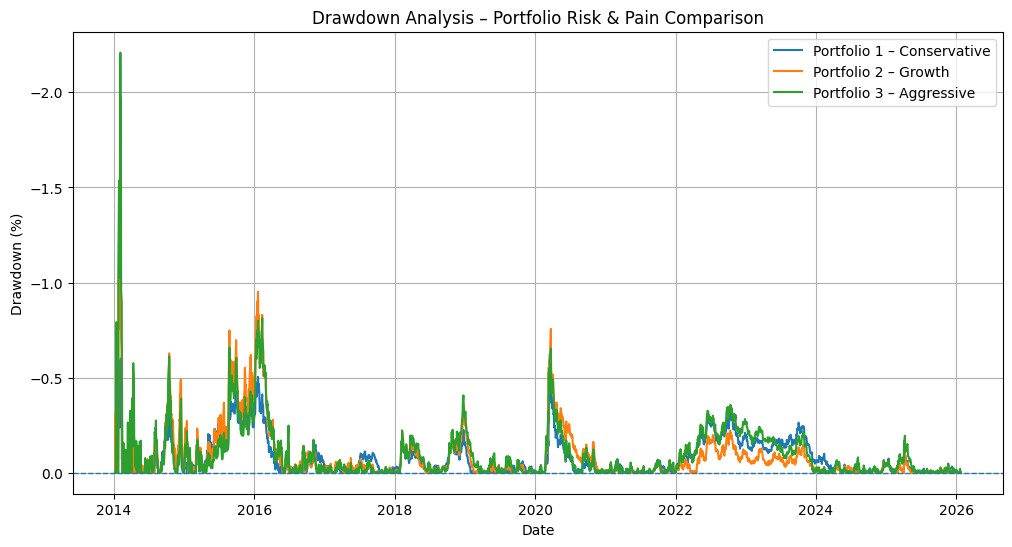

In [28]:
plt.figure(figsize=(12, 6))

plt.plot(portfolio_1_full["Date"], portfolio1_dd, label="Portfolio 1 – Conservative")
plt.plot(portfolio2_full["Date"], portfolio2_dd, label="Portfolio 2 – Growth")
plt.plot(portfolio_3["Date"], portfolio3_dd, label="Portfolio 3 – Aggressive")

plt.axhline(0, linestyle="--", linewidth=1)
plt.title("Drawdown Analysis – Portfolio Risk & Pain Comparison")
plt.xlabel("Date")
plt.ylabel("Drawdown (%)")
plt.gca().invert_yaxis()
plt.legend()
plt.grid(True)
plt.show()


In [31]:
portfolio3 = portfolio_3.copy()
portfolio3["Date"] = pd.to_datetime(portfolio3["Date"])
portfolio3 = portfolio3.set_index("Date")

In [32]:
recent_cutoff = portfolio3.index.max() - pd.DateOffset(months=12)
recent_portfolio3 = portfolio3.loc[portfolio3.index >= recent_cutoff]

In [33]:
running_max = recent_portfolio3["Cumulative_Return"].cummax()
drawdown_12m = (recent_portfolio3["Cumulative_Return"] - running_max) / running_max

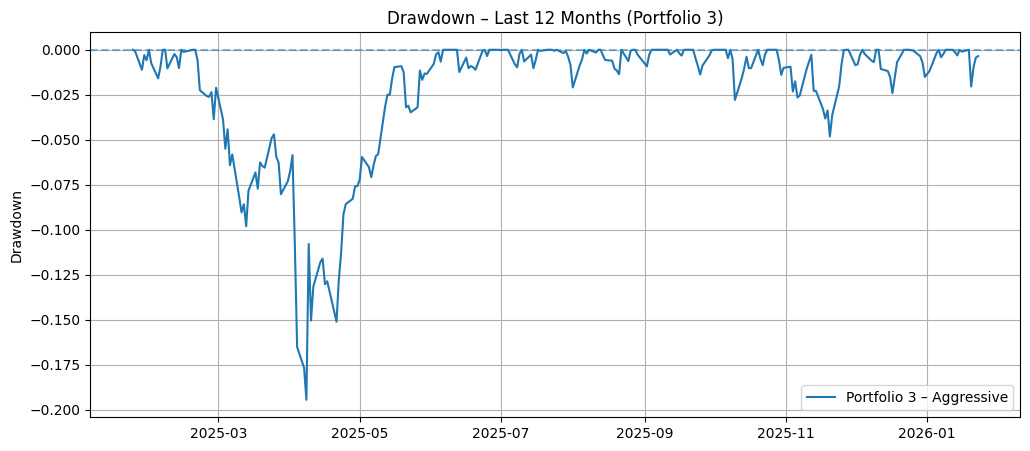

In [34]:
plt.figure(figsize=(12,5))
plt.plot(drawdown_12m, label="Portfolio 3 – Aggressive")
plt.axhline(0, linestyle="--", alpha=0.5)
plt.title("Drawdown – Last 12 Months (Portfolio 3)")
plt.ylabel("Drawdown")
plt.legend()
plt.grid(True)
plt.show()

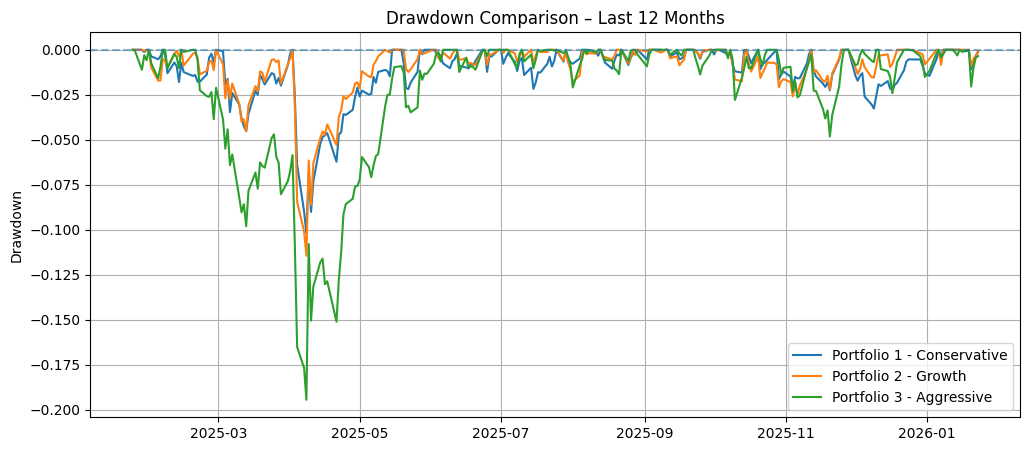

In [36]:
plt.figure(figsize=(12,5))

for name, df in {
    "Portfolio 1 - Conservative": portfolio_full,
    "Portfolio 2 - Growth": portfolio2_full,
    "Portfolio 3 - Aggressive": portfolio_3
}.items():
    
    temp = df.copy()
    temp["Date"] = pd.to_datetime(temp["Date"])
    temp = temp.set_index("Date")
    
    cutoff = temp.index.max() - pd.DateOffset(months=12)
    temp = temp.loc[temp.index >= cutoff]
    
    running_max = temp["Cumulative_Return"].cummax()
    drawdown = (temp["Cumulative_Return"] - running_max) / running_max
    
    plt.plot(drawdown, label=name)

plt.axhline(0, linestyle="--", alpha=0.5)
plt.title("Drawdown Comparison – Last 12 Months")
plt.ylabel("Drawdown")
plt.legend()
plt.grid(True)
plt.show()
